<a href="https://colab.research.google.com/github/snehahampapura/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**

#**Variables**
##**Each attribute is a potential risk factor. There are both demographic behavioral, and medical risk factors.**

##**Data Description**

*   **Demographic**
*   Sex: male or female("M" or "F")


*   Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

*   **Behavioral**
*   is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes,even half a cigarette.)

*   **Medical( history)**
*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal)

*   **Medical(current)**
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
*   Glucose: glucose level (Continuous)
*   Predict variable (desired target)

*   10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0”means “No”) - Dependent Variable























#**Importing the necessary libraries and reading the file**

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Data/data_cardiovascular_risk.csv')

# dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/datasets/data_cardiovascular_risk.csv')

#**Data Inspection**

In [ ]:
dataset.shape

(3390, 17)

In [ ]:
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
dataset.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
dataset.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3385    False
3386    False
3387    False
3388    False
3389    False
Length: 3390, dtype: bool

In [ ]:
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

#**Data Exploration**

####Checking for missing/null values

In [ ]:
#total percentage of missing data
missing_data = dataset.isnull().sum()
total_percentage = (missing_data.sum()/dataset.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.04%


In [ ]:
# percentage of missing data per category
total = dataset.isnull().sum().sort_values(ascending=False)
percent_total = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


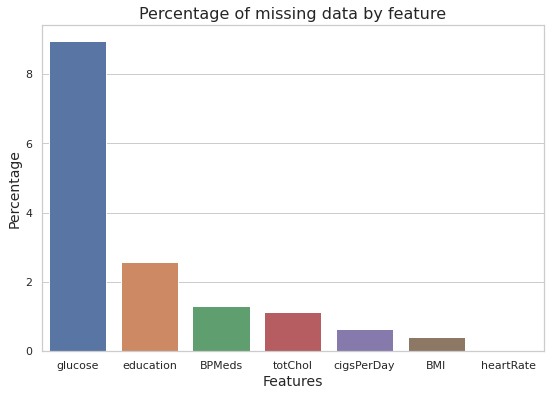

In [ ]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

==>At 8.9%, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.

==>Since the missing entries account for only 15% of the total data we can drop these entries without losing alot of data.

####Column Education

In [ ]:
dataset.isnull().sum()/len(dataset.index)*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [ ]:
#Since the educational qualification of the person doesnot have an impact on whether or not they will get a heart disease in future
#we are dropping that column
dataset.drop('education',axis=1,inplace=True)

####ID

In [ ]:
#Column ID doesnot contribute to our analysis as this is just a row identifier, we are dropping that.
#For now we will add all the columns that are not needed for our analysis to a list and drop the at the end.
dataset.drop('id',axis=1,inplace=True)

####After dropping of education and Id columns, again checking for null values

In [ ]:
dataset.isnull().sum()/len(dataset.index)*100

age                0.000000
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [ ]:
missing_data = dataset.isnull().sum()
total_percentage = (missing_data.sum()/dataset.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.48%


####dropping null values

In [ ]:
dataset.dropna(inplace=True)

####Column Age

In [ ]:
print("The minimun age present in the dataset is "+str(dataset['age'].min()))
print("The minimun age present in the dataset is "+str(dataset['age'].max()))

The minimun age present in the dataset is 32
The minimun age present in the dataset is 70


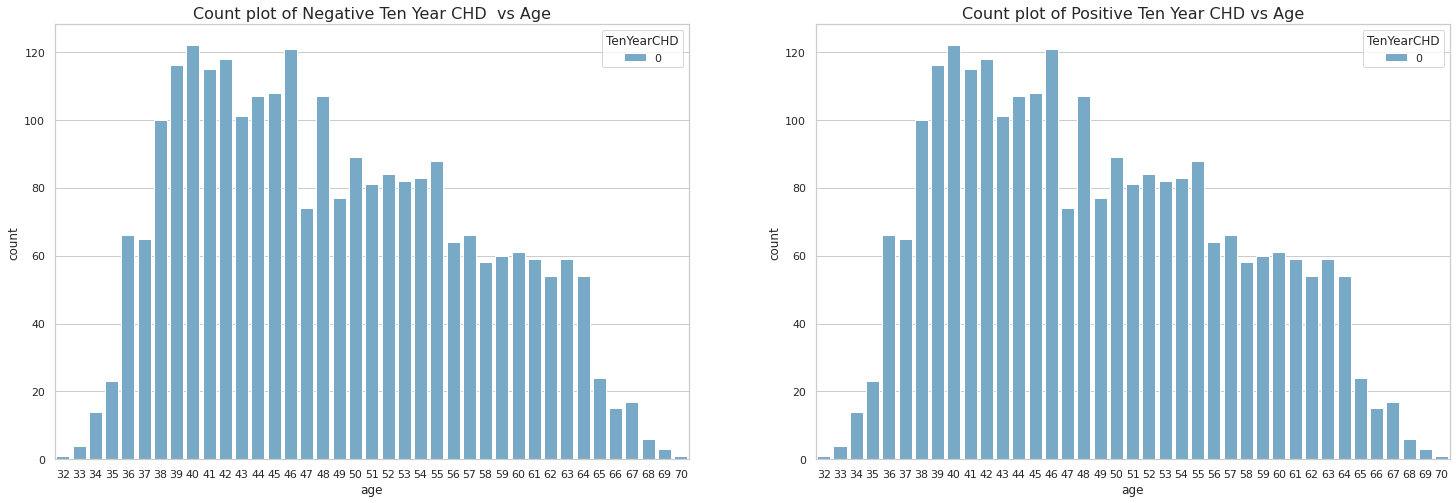

In [ ]:
positive_cases = dataset[dataset['TenYearCHD'] == 0]
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='Blues')
plt.title("Count plot of Negative Ten Year CHD  vs Age", fontsize=16)

negative_cases = dataset[dataset['TenYearCHD'] == 1]
plt.subplot(1,2,2)
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='Blues')
plt.title("Count plot of Positive Ten Year CHD vs Age", fontsize=16)

plt.show()


==> The chances of Getting Coronary Heart Disease is less in when the age is small. 

####is smoking

In [ ]:
dataset1 = dataset.groupby(['TenYearCHD','is_smoking']).agg('count').reset_index()
dataset1 = dataset1.iloc[:,0:3]
dataset1

,TenYearCHD,is_smoking,age
0,0,NO,1313
1,0,YES,1234
2,1,NO,211
3,1,YES,246


In [ ]:
dataset1.rename(columns={'age':'count'},inplace=True)

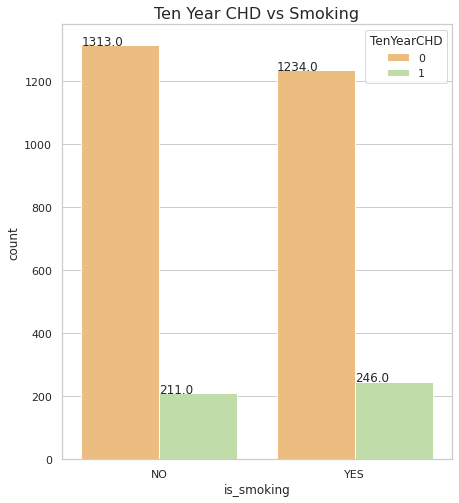

In [ ]:
plt.figure(figsize=(7, 8))
plt.title('Ten Year CHD vs Smoking',fontsize=16)
ax = sns.barplot(x = "is_smoking", y = "count" , hue="TenYearCHD", data=dataset1,palette='Spectral')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() ))
    # height = p.get_height() 
    # ax.annotate( "{}%".format(height),(p.get_x() + p.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)
plt.show()

==>13.8% of non smokers get CHD.
==>16.3% of smokers get CHD.

####Histogram

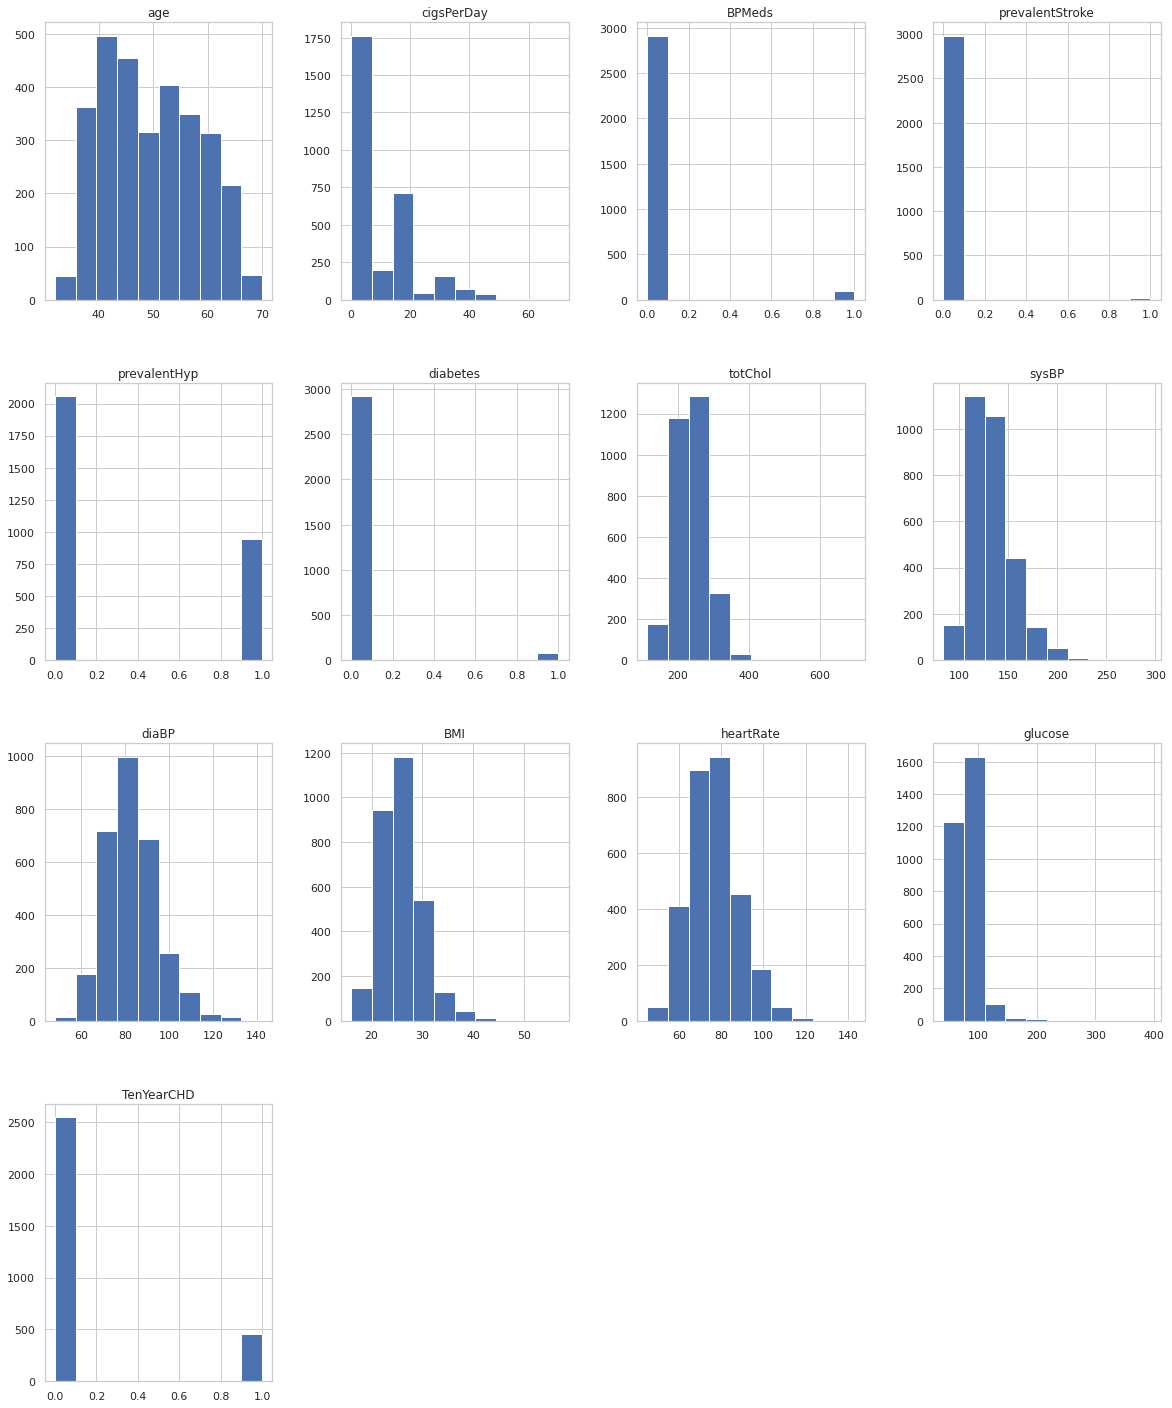

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (20,25))
ax = fig.gca()
dataset.hist(ax = ax) #color='light blue')
plt.show()

####Dependent Variable (TenYearCHD) analysis





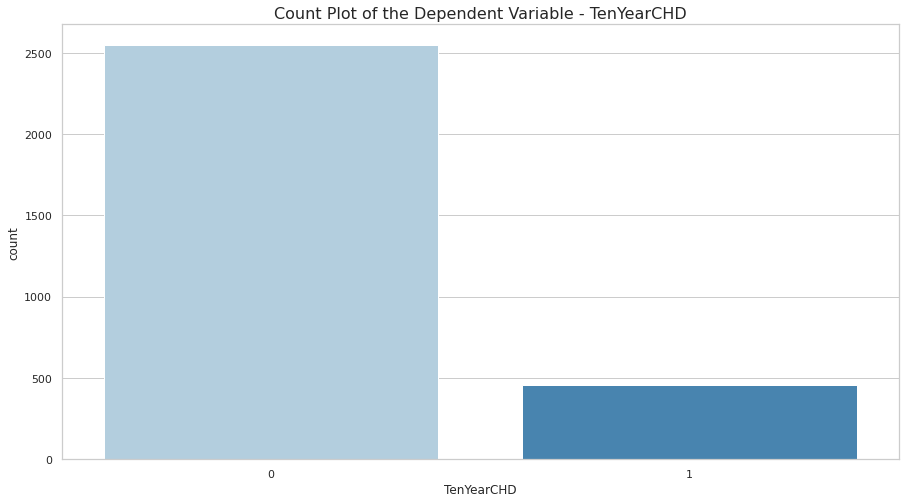

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x=dataset['TenYearCHD'],palette='Blues')
plt.title("Count Plot of the Dependent Variable - TenYearCHD",fontsize=16)
plt.show()

==>We can observe a huge difference in the count of zeros and ones in the dependent variable.Dependent variable is highly imbalanced.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3004 non-null   int64  
 1   sex              3004 non-null   object 
 2   is_smoking       3004 non-null   object 
 3   cigsPerDay       3004 non-null   float64
 4   BPMeds           3004 non-null   float64
 5   prevalentStroke  3004 non-null   int64  
 6   prevalentHyp     3004 non-null   int64  
 7   diabetes         3004 non-null   int64  
 8   totChol          3004 non-null   float64
 9   sysBP            3004 non-null   float64
 10  diaBP            3004 non-null   float64
 11  BMI              3004 non-null   float64
 12  heartRate        3004 non-null   float64
 13  glucose          3004 non-null   float64
 14  TenYearCHD       3004 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 440.0+ KB


In [ ]:
dataset['BMI'].value_counts()

22.54    15
22.91    15
22.19    12
23.48    12
25.94    11
         ..
27.55     1
24.64     1
17.61     1
44.27     1
29.19     1
Name: BMI, Length: 1203, dtype: int64

####Changing the datatype

In [ ]:
#Changing datatype
#Change the int64 column into category column

cols=['BPMeds','prevalentStroke','prevalentHyp','diabetes']

for col in cols:
  dataset[col]=dataset[col].astype('category')

####Heat map

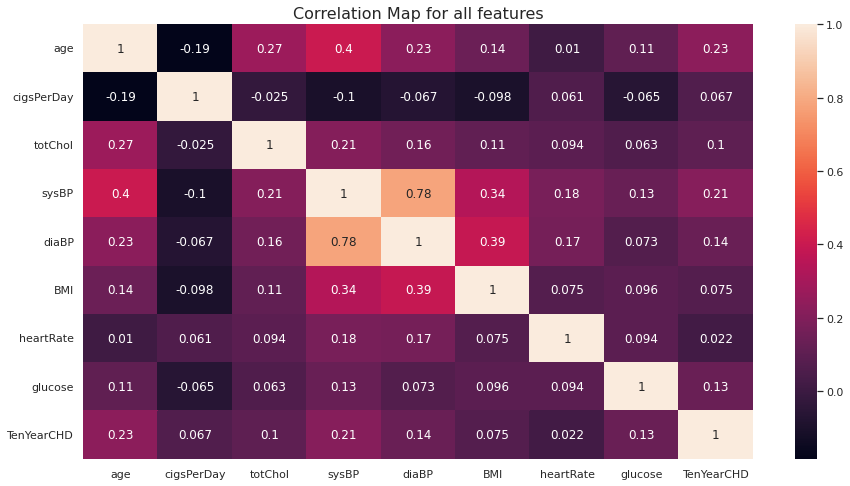

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot = True)
plt.title("Correlation Map for all features", fontsize=16)
plt.show()

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
vif_df = calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['TenYearCHD','diaBP','BMI']]])
vif_df

,variables,VIF
0,age,39.009350
1,cigsPerDay,1.610213
2,totChol,28.683318
3,sysBP,43.154104
4,heartRate,31.899248
5,glucose,12.404468


In [ ]:
numerical_features=list(vif_df['variables'])
numerical_features

['age', 'cigsPerDay', 'totChol', 'sysBP', 'heartRate', 'glucose']